In [1]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme()
import math
import pandas as pd


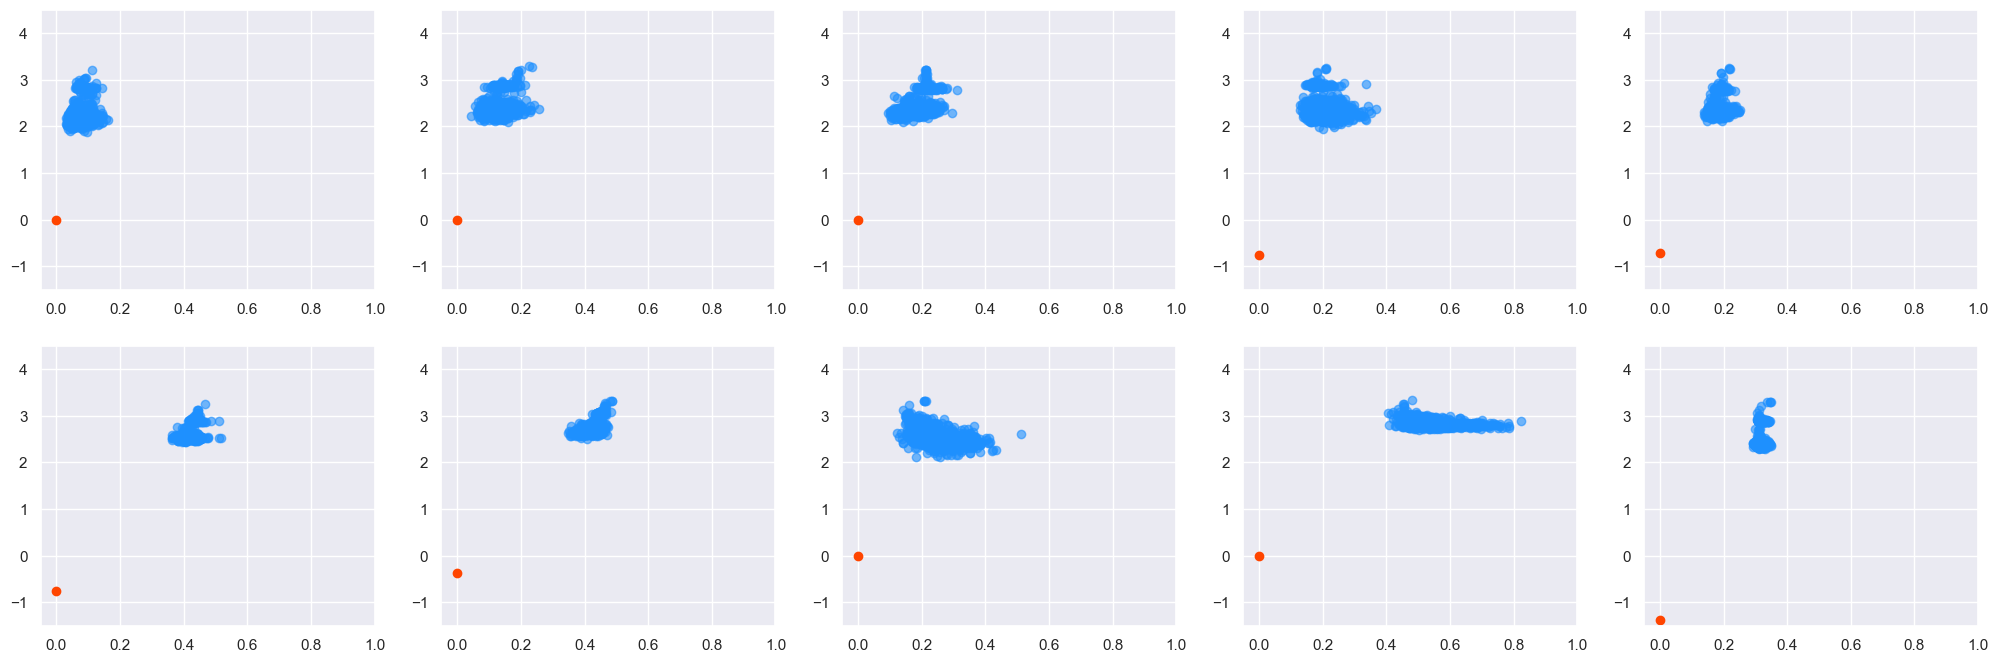

In [14]:
natives_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/19_synthetic_native_2/data/scores/4_state.csv"))
score_dfs = list()

for i in range(10):
    job_dir = Path(Path.home(), "Documents/xray/decoys/data/3ca7/112_synth_2_xray_weights")

    score_file = Path(job_dir, "{}.csv".format(i))

    score_df = pd.read_csv(score_file)
    score_dfs.append(score_df)

colors = list()
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

alpha_off = .2
alpha_on = .6

fig_file = Path(Path.home(), "Desktop/score_rmsd_correlation.png")
fig, axs = plt.subplots(2, 5, figsize=(25,8))

for i in range(10):
    custom_legend = list()
    custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[0], linestyle='None'))
    custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[1], linestyle='None'))

    ax = axs[i//5][i%5]
    ax.set_xlim(-.05,1)
    ax.set_ylim(-1.5, 4.5)
    ax.scatter(score_dfs[i]["rmsd_avg_0"], score_dfs[i]["xray_0"], c=colors[0], alpha=alpha_on)
    ax.scatter(natives_df.loc[i]["rmsd_avg_0"], natives_df.loc[i]["xray_0"], c=colors[2])

# plt.show()
plt.savefig(fig_file)


In [15]:
axs[1][0]

<Axes: >

In [18]:
2 // 5

0